<a href="https://colab.research.google.com/github/DongyounKim/basic_step/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Google colab version check
!python --version
#Check the list of moudules about pytorch
##!pip list | grep torch

Python 3.7.12


**Reference**

This is linear regression model based on "Full Stack Deep Learning course, Spring 2021" from https://colab.research.google.com/drive/1HS3qbHArkqFlImT2KnF5pcMCz7ueHNvY?usp=sharing

In [2]:
import numpy as np
#Drawing framework
import matplotlib.pyplot as plt

# Basic regression


## Generate syntatic data


In [3]:
#The number of data
n= 50
#The dimension of data
d=1
#Generating synthetic data values
x= np.random.uniform(-1,1,(n,d))
#x=np.random.normal(3,2,n)
#1D
weights_true = np.array([[5],]).T
#2D
#weights_true = np.array([[5, 1],]).T
bias_true = np.array([10])
# @ is np.matmul
y_true = x @ weights_true + bias_true

In [4]:
#x.shape

In [5]:
#Drawing function
def plot_graph(x,y, y_pred=None):
  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(x[:, 0], x[:, 1], y, label='underlying function')
  #Drawing predicted model
  if y_pred is not None:
    ax.scatter(x[:, 0], x[:, 1], y_pred, label='our function')
  plt.legend()

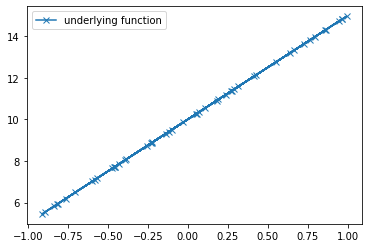

In [6]:
plt.plot(x, y_true, marker='x', label='underlying function')
plt.legend()

## With a linear model

In [7]:
# class basic_linear:
#   def __init__(self, input_dim: int, num_hidden: int =1):
#     self.weight= np.random.randn(input_dim,num_hidden) *np.sqrt(2./input_dim)
#     self.bias = np.zeros(num_hidden)
  
#   def __call__(self,x):
#     self.x = x
#     output = x @ self.weight + self.bias
#     return output
  
#   def backward(self,gradient):
#     self.weight_gradient = self.x.T @ gradient
#     self.bias_gradient = gradient.sum(axis=0)
#     #print('backward', gradient.shape, self.weight.T.shape)
#     self.x_gradient = gradient @ self.weight.T
#     #print('backward', self.weight_gradient, self.bias_gradient, self.x_gradient)
#     return self.x_gradient
  
#   def update(self, lr):
#     self.weight = self.weight - lr*self.weight_gradient
#     self.bias = self.bias - self.bias_gradient

In [8]:
class basic_linear:
  def __init__(self, input_dim: int, num_hidden: int = 1):
    self.weights = np.random.randn(input_dim, num_hidden) * np.sqrt(2. / input_dim)
    self.bias = np.zeros(num_hidden)
  
  def __call__(self, x):
    self.x = x
    output = x @ self.weights + self.bias
    return output

  def backward(self, gradient):
    self.weights_gradient = self.x.T @ gradient
    self.bias_gradient = gradient.sum(axis=0)
    self.x_gradient = gradient @ self.weights.T
    return self.x_gradient

  def update(self, lr):
    self.weights = self.weights - lr * self.weights_gradient
    self.bias = self.bias - lr * self.bias_gradient

In [9]:
#__init__ function ;; declaration of instance of class basic_linear
#linear=basic_linear(d)
#__call__ : call for linear instance
#y_predict= linear(x)

In [10]:
#from numpy.lib.function_base import gradient
class MSE:
  def __call__(self,y_pred,y_true):
    self.y_pred=y_pred
    self.y_true=y_true
    return((y_pred-y_true)**2).mean()
  
  def backward(self):
    n= self.y_true.shape[0]
    #print('y_true shape is {}'.format(n))
    self.gradient = 2. * (self.y_pred - self.y_true) / n
    #print('MSE backward', self.y_pred.shape, self.y_true.shape, self.gradient.shape)
    return self.gradient

In [11]:
from typing import Callable
def fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  for epoch in range(num_epochs):
    y_pred = model(x)
    loss_value = loss(y_pred, y)
    print(f'Epoch {epoch}, loss {loss_value}')
    gradient_from_loss = loss.backward()
    model.backward(gradient_from_loss)
    model.update(lr)
  #plot_graph(x, y, y_pred)

Epoch 0, loss 107.37388454671964
Epoch 5, loss 13.683712566702265
Epoch 10, loss 2.572502181232176
Epoch 15, loss 0.839482948351947
Epoch 20, loss 0.3775427172457949
Epoch 25, loss 0.1871669477368843
Epoch 30, loss 0.09490230840209322
Epoch 35, loss 0.048353263362829225


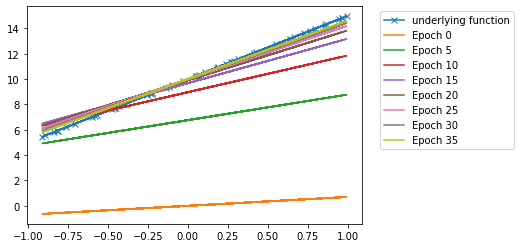

In [12]:
plt.plot(x, y_true, marker='x', label='underlying function')

loss = MSE()
linear = basic_linear(d)

num_epochs = 40
lr = 0.1

for epoch in range(num_epochs):
  y_pred = linear(x)
  loss_value = loss(y_pred, y_true)

  if epoch % 5 == 0:
    print(f'Epoch {epoch}, loss {loss_value}')
    plt.plot(x, y_pred.squeeze(), label=f'Epoch {epoch}')

  gradient_from_loss = loss.backward()
  linear.backward(gradient_from_loss)
  linear.update(lr)

plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left");

In [13]:
#print(loss(y_predict,y_true))
#loss_gradient = loss.backward()

#Declaration of linear class for the model what we will use
linear=basic_linear(d)
#Declaration of MSE class; this is for loss model
loss=MSE()
#plt.plot(x, y_true, marker='x', label='underlying function')
#print(y_true)
fit(x, y_true, model=linear, loss=loss, lr=0.1, num_epochs=50)
#plot_graph(x, y_true, linear(x))

Epoch 0, loss 106.11366091261078
Epoch 1, loss 68.91033645453841
Epoch 2, loss 44.97738111392244
Epoch 3, loss 29.551919743522152
Epoch 4, loss 19.5842555278906
Epoch 5, loss 13.121178137060895
Epoch 6, loss 8.911321564330818
Epoch 7, loss 6.152611644218479
Epoch 8, loss 4.330637756294721
Epoch 9, loss 3.1152083799630073
Epoch 10, loss 2.2941401534509267
Epoch 11, loss 1.73087434321501
Epoch 12, loss 1.3373421061432689
Epoch 13, loss 1.056588980540656
Epoch 14, loss 0.8516457050416945
Epoch 15, loss 0.6983973247543213
Epoch 16, loss 0.5810119304090766
Epoch 17, loss 0.48900831009333373
Epoch 18, loss 0.41537322882867755
Epoch 19, loss 0.35535114769079457
Epoch 20, loss 0.30566492545855756
Epoch 21, loss 0.264012910529055
Epoch 22, loss 0.22874342515519552
Epoch 23, loss 0.19864322759042918
Epoch 24, loss 0.17279931547967223
Epoch 25, loss 0.15050801633429092
Epoch 26, loss 0.13121464849486802
Epoch 27, loss 0.1144730165953589
Epoch 28, loss 0.09991783738187637
Epoch 29, loss 0.08724564

In [14]:
# #Declaration of MSE class & No __init__ function
# loss=MSE()
# print(loss(y_predict,y_true))
# loss_gradient = loss.backward()
# linear.backward(loss_gradient)
# linear.update(0.1)
# y_predict= linear(x)
# print(loss(y_predict,y_true))

In [15]:
# !git clone link

In [16]:
# from google.colab import drive
# drive.mount('/content/drive')

In [17]:
# %cd /content/drive/MyDrive/

## With a non-liear model

x: (200, 2), weights: (2, 1), bias: (1,), y: (200, 1)


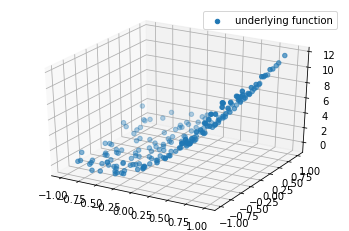

In [24]:
# Make non-linear data
n_non = 200
d_non = 2
x_non = np.random.uniform(-1, 1, (n_non, d_non))

weights_true = np.array([[5, 1],]).T
bias_true = np.array([1])

y_true_non = (x_non ** 2) @ weights_true + x_non @ weights_true + bias_true
print(f'x: {x_non.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true_non.shape}')

plot_graph(x_non, y_true_non)

Epoch 0, loss 12.58683066901983
Epoch 1, loss 9.71948101021723
Epoch 2, loss 7.787382757385268
Epoch 3, loss 6.46441835841272
Epoch 4, loss 5.540768915738409
Epoch 5, loss 4.881143914342231
Epoch 6, loss 4.398046568342355
Epoch 7, loss 4.034658863783612
Epoch 8, loss 3.7538816356731477
Epoch 9, loss 3.531313227592175
Epoch 10, loss 3.3507487603423773
Epoch 11, loss 3.201292825798846
Epoch 12, loss 3.0755051804213407
Epoch 13, loss 2.968208047621861
Epoch 14, loss 2.8757173656701314
Epoch 15, loss 2.7953458712018744
Epoch 16, loss 2.725080644463824
Epoch 17, loss 2.663372764164946
Epoch 18, loss 2.608999129713534
Epoch 19, loss 2.560970850162982
Epoch 20, loss 2.5184717788294195
Epoch 21, loss 2.480816649577991
Epoch 22, loss 2.4474220346321105
Epoch 23, loss 2.4177857553624005
Epoch 24, loss 2.3914719236626536
Epoch 25, loss 2.3680997836677458
Epoch 26, loss 2.347335160984762
Epoch 27, loss 2.3288837368029225
Epoch 28, loss 2.3124856288198368
Epoch 29, loss 2.297910932099343
Epoch 30, 

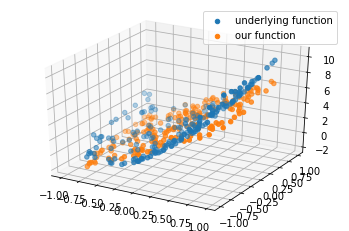

In [19]:
loss_non = MSE()
linear_non = basic_linear(d_non)
##?? The output of basic_linear is x @ weight.T + bias -> but it is non-linear function...!!
fit(x_non, y_true_non, model=linear_non, loss=loss_non, lr=0.1, num_epochs=40)
plot_graph(x_non, y_true_non, linear_non(x_non))

### Relu - non-linearity function

In [20]:
# To training non-linear functions, we need non-linearities in our model
class Relu:
    def __call__(self, input_):
        self.input_ = input_
        self.output = np.clip(self.input_, 0, None)
        return self.output
    
    def backward(self, output_gradient):
      # import pdb; pdb.set_trace()  # By the way, this is how you can debug
      self.input_gradient = (self.input_ > 0) * output_gradient
      return self.input_gradient


relu = Relu()

In [27]:
class Model:
  def __init__(self, input_dim, num_hidden):
    self.linear1 =basic_linear(input_dim, num_hidden)
    self.relu = Relu()
    self.linear2 = basic_linear(num_hidden, 1)
  
  def __call__(self, x):
    l1 = self.linear1(x)
    r = self.relu(l1)
    l2 = self.linear2(r)
    return l2
  
  def backward(self, output_gradient):
    linear2_gradient = self.linear2.backward(output_gradient)
    relu_gradient = self.relu.backward(linear2_gradient)
    linear1_gradient = self.linear1.backward(relu_gradient)
    # print('Model backward', linear2_gradient.shape, relu_gradient.shape, linear1_gradient.shape)
    # import pdb; pdb.set_trace()
    return linear1_gradient

  def update(self, lr):
    self.linear2.update(lr)
    self.linear1.update(lr)
  
  def update(self, lr):
    self.linear2.update(lr)
    self.linear1.update(lr)

28.242732341382634


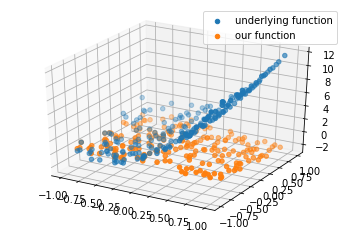

In [28]:
loss_non = MSE()
model_non = Model(d_non, 10)
y_pred_non = model_non(x_non)

loss_value_non = loss_non(y_pred_non, y_true_non)
loss_gradient_non = loss_non.backward()
print(loss_value_non)
model_non.backward(loss_gradient_non)
plot_graph(x_non, y_true_non, y_pred_non)

Epoch 0, loss 0.10108163002818638
Epoch 1, loss 0.09987667915000109
Epoch 2, loss 0.098712280700021
Epoch 3, loss 0.09758955568424531
Epoch 4, loss 0.09651009318609569
Epoch 5, loss 0.0954674363515375
Epoch 6, loss 0.09446043560319656
Epoch 7, loss 0.09348840738931473
Epoch 8, loss 0.09255638341392931
Epoch 9, loss 0.09165331363456446
Epoch 10, loss 0.09077137656431582
Epoch 11, loss 0.08991716785290403
Epoch 12, loss 0.08908869111433691
Epoch 13, loss 0.0882869093984731
Epoch 14, loss 0.08750642973679051
Epoch 15, loss 0.08674910080400085
Epoch 16, loss 0.08600227168131692
Epoch 17, loss 0.08527639809321826
Epoch 18, loss 0.08457045507843126
Epoch 19, loss 0.08389033165155717
Epoch 20, loss 0.08323349791740778
Epoch 21, loss 0.08260318592720232
Epoch 22, loss 0.08199824398882204
Epoch 23, loss 0.08141414198606758
Epoch 24, loss 0.08084956089239378
Epoch 25, loss 0.08029772208789429
Epoch 26, loss 0.07976367246832919
Epoch 27, loss 0.07924516958038637
Epoch 28, loss 0.07871147603455003

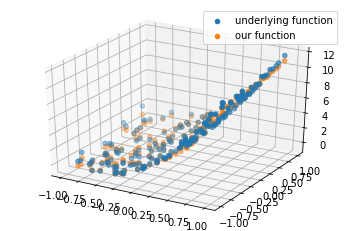

In [31]:
fit(x_non, y_true_non, model=model_non, loss=loss_non, lr=0.1, num_epochs=40)
plot_graph(x_non, y_true_non, model_non(x_non))

## Pytorch

In [33]:
import torch
import torch.nn as nn


class TorchModel(nn.Module):
  def __init__(self, input_dim, num_hidden):
    super().__init__()
    self.linear1 = nn.Linear(input_dim, num_hidden)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(num_hidden, 1)
  
  def forward(self, x):
    l1 = self.linear1(x)
    r = self.relu(l1)
    l2 = self.linear2(r)
    return l2


loss = nn.MSELoss()
model = TorchModel(d_non, 10)
x_tensor = torch.tensor(x_non).float()
y_true_tensor = torch.tensor(y_true_non).float()
y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)

tensor(23.3840, grad_fn=<MseLossBackward0>)


tensor(0.1683, grad_fn=<MseLossBackward0>)
tensor(0.1674, grad_fn=<MseLossBackward0>)
tensor(0.1666, grad_fn=<MseLossBackward0>)
tensor(0.1657, grad_fn=<MseLossBackward0>)
tensor(0.1649, grad_fn=<MseLossBackward0>)
tensor(0.1641, grad_fn=<MseLossBackward0>)
tensor(0.1633, grad_fn=<MseLossBackward0>)
tensor(0.1624, grad_fn=<MseLossBackward0>)
tensor(0.1616, grad_fn=<MseLossBackward0>)
tensor(0.1608, grad_fn=<MseLossBackward0>)
tensor(0.1600, grad_fn=<MseLossBackward0>)
tensor(0.1593, grad_fn=<MseLossBackward0>)
tensor(0.1585, grad_fn=<MseLossBackward0>)
tensor(0.1578, grad_fn=<MseLossBackward0>)
tensor(0.1570, grad_fn=<MseLossBackward0>)
tensor(0.1563, grad_fn=<MseLossBackward0>)
tensor(0.1556, grad_fn=<MseLossBackward0>)
tensor(0.1548, grad_fn=<MseLossBackward0>)
tensor(0.1541, grad_fn=<MseLossBackward0>)
tensor(0.1534, grad_fn=<MseLossBackward0>)
tensor(0.1527, grad_fn=<MseLossBackward0>)
tensor(0.1520, grad_fn=<MseLossBackward0>)
tensor(0.1513, grad_fn=<MseLossBackward0>)
tensor(0.15

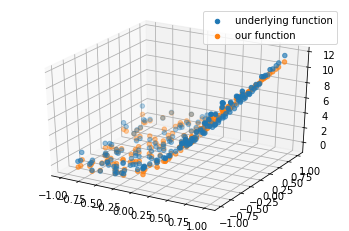

In [36]:
def torch_fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  optimizer = torch.optim.SGD(model.parameters(), lr=lr)
  for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred_tensor = model(x_tensor)
    loss_value = loss(y_pred_tensor, y_true_tensor)
    print(loss_value)
    loss_value.backward()
    optimizer.step()

torch_fit(x_tensor, y_true_tensor, model=model, loss=loss, lr=0.1, num_epochs=40)
plot_graph(x_non, y_true_non, model(x_tensor).detach())

## Tensorflow/Keras

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_1 (Dense)             (None, 10)                30        
                                                                 
 regression (Dense)          (None, 1)                 11        
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
7/7 [==============================] - 1s 3ms/step - loss: 8.8422
Epoch 2/10
7/7 [==============================] - 0s 4ms/step - loss: 1.1230
Epoch 3/10
7/7 [==============================] - 0s 3ms/step - loss: 0.3964
Epoch 4/10
7/7 [==============================] - 0s 4ms/step - loss: 0.2953
Epoch 5/10
7/7

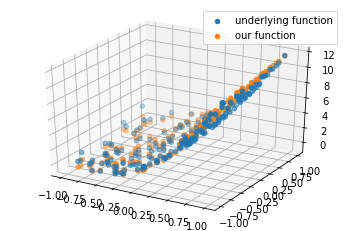

In [38]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers

inputs = keras.Input(shape=(2,))
l1 = layers.Dense(10, activation='relu', name='dense_1')(inputs)
outputs = layers.Dense(1, name='regression')(l1)

model = keras.Model(inputs=inputs, outputs=outputs)
print(model.summary())
model.compile(loss='mse', optimizer=optimizers.SGD(0.1))

model.fit(x_non, y_true_non, epochs=10)

y_pred = model.predict(x_non)

plot_graph(x_non, y_true_non, model(x_non))